In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import pandas as pd 
import numpy as np

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
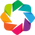

In [4]:
from SSMuLA.zs_analysis import ZS_OPTS, ZS_COMB_OPTS, ZS_OPTS_LEGEND
from SSMuLA.vis_summary import ZS_COLOR_MAP_APPENDED
from SSMuLA.vis import PRESENTATION_PALETTE_SATURATE

In [6]:
# test if emb > oh
mlde_old = pd.read_csv("results/mlde/vis_5/all_df.csv")
emd_mlde = pd.read_csv("results/mlde_emb/vis/all_df.csv")

In [7]:
mlde = pd.concat([mlde_old, emd_mlde], axis=0)
mlde

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
0,one-hot,boosting,192,4000,0,0.935697,0.153123,1.000000,0.409558,0.892434,0.437613,1.0,199.0,all,DHFR,Triad-esm_score,384,max
1,one-hot,boosting,192,4000,1,0.813921,0.164246,1.000000,0.455075,0.928627,0.482690,1.0,88.0,all,DHFR,Triad-esm_score,384,max
2,one-hot,boosting,192,4000,2,0.798997,0.163849,1.000000,0.490490,0.931763,0.446393,1.0,82.0,all,DHFR,Triad-esm_score,384,max
3,one-hot,boosting,192,4000,3,0.997845,0.157741,1.000000,0.484294,0.928540,0.406754,1.0,0.0,all,DHFR,Triad-esm_score,384,max
4,one-hot,boosting,192,4000,4,0.752007,0.146420,0.865538,0.456413,0.913301,0.445943,0.0,520.0,all,DHFR,Triad-esm_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175195,esm2_t33_650M_UR50D-mean_site,ridge,48,159129,45,0.070773,0.013614,0.468391,0.079868,0.966341,0.088359,0.0,45230.0,all,TrpB4,none,96,max
175196,esm2_t33_650M_UR50D-mean_site,ridge,48,159129,46,0.268851,0.033997,0.526490,0.200232,0.975576,0.147316,0.0,33302.0,all,TrpB4,none,96,max
175197,esm2_t33_650M_UR50D-mean_site,ridge,48,159129,47,0.065157,0.013984,0.460182,0.074204,0.967207,0.070645,0.0,131751.0,all,TrpB4,none,96,max
175198,esm2_t33_650M_UR50D-mean_site,ridge,48,159129,48,0.206336,0.033926,0.676504,0.200555,0.976175,0.128688,0.0,974.0,all,TrpB4,none,96,max


In [7]:
mlde["encoding"].unique()

array(['one-hot', 'esm2_t33_650M_UR50D-flatten_site',
       'esm2_t33_650M_UR50D-mean_all', 'esm2_t33_650M_UR50D-mean_site'],
      dtype=object)

In [8]:
encoding_style = {
    'one-hot': "solid",
    'esm2_t33_650M_UR50D-flatten_site': "dashed",
    'esm2_t33_650M_UR50D-mean_all': "dashdot",
    'esm2_t33_650M_UR50D-mean_site': "dotted"
}

In [9]:
mlde.columns

Index(['encoding', 'model', 'n_sample', 'ft_lib', 'rep', 'all_maxes',
       'all_means', 'top_maxes', 'top_means', 'ndcgs', 'rhos', 'if_truemaxs',
       'truemax_inds', 'n_mut_cutoff', 'lib', 'zs', 'n_top', 'scale_fit'],
      dtype='object')

In [10]:
mlde[mlde["n_top"]==96].set_index(["lib", "zs", "encoding"])

model  n_sample  \
lib   zs              encoding                                            
DHFR  Triad-esm_score one-hot                        boosting       192   
                      one-hot                        boosting       192   
                      one-hot                        boosting       192   
                      one-hot                        boosting       192   
                      one-hot                        boosting       192   
...                                                       ...       ...   
TrpB4 none            esm2_t33_650M_UR50D-mean_site     ridge        48   
                      esm2_t33_650M_UR50D-mean_site     ridge        48   
                      esm2_t33_650M_UR50D-mean_site     ridge        48   
                      esm2_t33_650M_UR50D-mean_site     ridge        48   
                      esm2_t33_650M_UR50D-mean_site     ridge        48   

                                                     ft_lib  rep  all_maxes  \
lib   zs              encoding                                                
DHFR  Triad-esm_score one-hot                          4000    0   0.935697   
                      one-hot                          4000    1   0.813921   
                      one-hot                          4000    2   0.798997   
                      one-hot                          4000    3   0.997845   
                      one-hot                          4000    4   0.752007   
...                                                     ...  ...        ...   
TrpB4 none            esm2_t33_650M_UR50D-mean_site  159129   45   0.070773   
                      esm2_t33_650M_UR50D-mean_site  159129   46   0.268851   
                      esm2_t33_650M_UR50D-mean_site  159129   47   0.065157   
                      esm2_t33_650M_UR50D-mean_site  159129   48   0.206336   
                      esm2_t33_650M_UR50D-mean_site  159129   49   0.197000   

                                                     all_means  top_maxes  \
lib   zs              encoding                                              
DHFR  Triad-esm_score one-hot                         0.153123   0.982530   
                      one-hot                         0.164246   1.000000   
                      one-hot                         0.163849   1.000000   
                      one-hot                         0.157741   1.000000   
                      one-hot                         0.146420   0.865538   
...                                                        ...        ...   
TrpB4 none            esm2_t33_650M_UR50D-mean_site   0.013614   0.468391   
                      esm2_t33_650M_UR50D-mean_site   0.033997   0.526490   
                      esm2_t33_650M_UR50D-mean_site   0.013984   0.460182   
                      esm2_t33_650M_UR50D-mean_site   0.033926   0.676504   
                      esm2_t33_650M_UR50D-mean_site   0.011201   0.742180   

                                                     top_means     ndcgs  \
lib   zs              encoding                                             
DHFR  Triad-esm_score one-hot                         0.451361  0.892434   
                      one-hot                         0.604757  0.928627   
                      one-hot                         0.585007  0.931763   
                      one-hot                         0.549602  0.928540   
                      one-hot                         0.512380  0.913301   
...                                                        ...       ...   
TrpB4 none            esm2_t33_650M_UR50D-mean_site   0.079868  0.966341   
                      esm2_t33_650M_UR50D-mean_site   0.200232  0.975576   
                      esm2_t33_650M_UR50D-mean_site   0.074204  0.967207   
                      esm2_t33_650M_UR50D-mean_site   0.200555  0.976175   
                      esm2_t33_650M_UR50D-mean_site   0.240637  0.973610   

                                                         rhos

In [11]:
mlde[(mlde["n_top"]==96)&(mlde["zs"].isin(ZS_OPTS))&(mlde["n_mut_cutoff"]=="all")].set_index(["lib", "zs", "encoding"])[["n_sample","top_maxes", "if_truemaxs"]].groupby(["lib", "zs", "encoding", "n_sample"]).agg(["mean", "std"])

top_maxes  \
                                                                 mean   
lib   zs          encoding                         n_sample             
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 24        0.821866   
                                                   48        0.872571   
                                                   96        0.887551   
                                                   192       0.908667   
                                                   288       0.915527   
...                                                               ...   
TrpB4 ev_score    one-hot                          384       0.839768   
                                                   480       0.864040   
                                                   576       0.864592   
                                                   960       0.886223   
                                                   1920      0.911577   

                                                                       \
                                                                  std   
lib   zs          encoding                         n_sample             
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 24        0.172962   
                                                   48        0.108643   
                                                   96        0.092280   
                                                   192       0.067564   
                                                   288       0.067280   
...                                                               ...   
TrpB4 ev_score    one-hot                          384       0.116966   
                                                   480       0.109322   
                                                   576       0.110192   
                                                   960       0.102219   
                                                   1920      0.093917   

                                                            if_truemaxs  \
                                                                   mean   
lib   zs          encoding                         n_sample               
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 24          0.036667   
                                                   48          0.080000   
                                                   96          0.076667   
                                                   192         0.156667   
                                                   288         0.176667   
...                                                                 ...   
TrpB4 ev_score    one-hot                          384         0.230000   
                                                   480         0.290000   
                                                   576         0.293333   
                                                   960         0.340000   
                                                   1920        0.423333   

                                                                       
                                                                  std  
lib   zs          encoding                         n_sample            
DHFR  Triad_score esm2_t33_650M_UR50D-flatten_site 24        0.188256  
                                                   48        0.271746  
                                                   96        0.266506  
                                                   192       0.364094  
                                                   288       0.382024  
...                                                               ...  
TrpB4 ev_score    one-hot                          384       0.421184  
                                                   480       0.454520  
                                                   576       0.456051  
                                                   960       0.474500  
                           

In [12]:
slice_df = (
    mlde[(mlde["n_top"] == 96) & (mlde["zs"].isin(["none"] + ZS_OPTS)) & (mlde["n_mut_cutoff"]=="all")]
    .set_index(["zs", "encoding"])[["n_sample", "top_maxes", "if_truemaxs"]]
    .groupby(["zs", "encoding", "n_sample"])
    .agg(["mean", "std"])
)
slice_df.columns = slice_df.columns.map("_".join)
slice_df = slice_df.reset_index()
slice_df

,zs,encoding,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,Triad_score,esm2_t33_650M_UR50D-flatten_site,24,0.568765,0.367015,0.139524,0.346534
1,Triad_score,esm2_t33_650M_UR50D-flatten_site,48,0.640213,0.361446,0.219286,0.413812
2,Triad_score,esm2_t33_650M_UR50D-flatten_site,96,0.712644,0.339066,0.313810,0.464095
3,Triad_score,esm2_t33_650M_UR50D-flatten_site,192,0.791242,0.300128,0.433571,0.495627
4,Triad_score,esm2_t33_650M_UR50D-flatten_site,288,0.830194,0.272383,0.500714,0.500059
...,...,...,...,...,...,...,...
123,none,one-hot,384,0.747245,0.340636,0.409286,0.491790
124,none,one-hot,480,0.779634,0.323146,0.459286,0.498518
125,none,one-hot,576,0.795640,0.312706,0.483571,0.499909
126,none,one-hot,960,0.842118,0.279887,0.572857,0.494840


In [13]:
ds_df = mlde[(mlde["n_top"] == 96) & (mlde["zs"]=="none") & (mlde["n_mut_cutoff"]=="double")].copy()
ds_df["zs"] = "ed_score"
ds_df

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
1652700,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,0,0.841583,0.186576,1.000000,0.704855,0.959451,0.386621,1.0,10.0,double,DHFR,ed_score,96,max
1652701,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,1,0.857225,0.185362,1.000000,0.732227,0.967116,0.391226,1.0,17.0,double,DHFR,ed_score,96,max
1652702,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,2,0.852774,0.181143,0.996537,0.721951,0.966861,0.386016,0.0,130.0,double,DHFR,ed_score,96,max
1652703,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,3,0.846023,0.188001,1.000000,0.726634,0.963988,0.394607,1.0,17.0,double,DHFR,ed_score,96,max
1652704,esm2_t33_650M_UR50D-flatten_site,boosting,384,1141,4,0.849244,0.167622,0.959943,0.687000,0.958187,0.410142,0.0,228.0,double,DHFR,ed_score,96,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726395,one-hot,ridge,1920,2243,45,0.459118,-0.070574,0.742180,0.453682,0.988857,0.233160,0.0,733.0,double,TrpB4,ed_score,96,max
1726396,one-hot,ridge,1920,2243,46,0.502192,-0.044612,0.742180,0.442649,0.988762,0.232063,0.0,558.0,double,TrpB4,ed_score,96,max
1726397,one-hot,ridge,1920,2243,47,0.435301,-0.078705,0.742180,0.443041,0.989154,0.238140,0.0,1199.0,double,TrpB4,ed_score,96,max
1726398,one-hot,ridge,1920,2243,48,0.483840,-0.066038,0.794516,0.454544,0.989159,0.236456,0.0,724.0,double,TrpB4,ed_score,96,max


In [14]:
ds_slice = ds_df.set_index(["zs", "encoding"])[["n_sample", "top_maxes", "if_truemaxs"]].groupby(["zs", "encoding", "n_sample"]).agg(["mean", "std"])
ds_slice.columns = ds_slice.columns.map("_".join)
ds_slice = ds_slice.reset_index()
ds_slice

,zs,encoding,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,ed_score,esm2_t33_650M_UR50D-flatten_site,96,0.733323,0.319617,0.385833,0.486994
1,ed_score,esm2_t33_650M_UR50D-flatten_site,192,0.821147,0.274658,0.550833,0.497617
2,ed_score,esm2_t33_650M_UR50D-flatten_site,288,0.858105,0.242870,0.627500,0.483672
3,ed_score,esm2_t33_650M_UR50D-flatten_site,384,0.884289,0.216644,0.682500,0.465698
4,ed_score,esm2_t33_650M_UR50D-flatten_site,480,0.907945,0.188607,0.730000,0.444145
5,ed_score,esm2_t33_650M_UR50D-flatten_site,576,0.924587,0.166470,0.767500,0.422602
6,ed_score,esm2_t33_650M_UR50D-mean_all,96,0.697072,0.329085,0.301667,0.459173
7,ed_score,esm2_t33_650M_UR50D-mean_all,192,0.755691,0.299012,0.368333,0.482554
8,ed_score,esm2_t33_650M_UR50D-mean_all,288,0.800125,0.274081,0.447500,0.497443
9,ed_score,esm2_t33_650M_UR50D-mean_all,384,0.820606,0.262153,0.493333,0.500164


In [15]:
slice_df["zs"].unique()

array(['Triad_score', 'esm_score', 'esmif_score', 'ev_score', 'none'],
      dtype=object)

In [16]:
all_slice = pd.concat([ds_slice, slice_df],axis=0)
all_slice

,zs,encoding,n_sample,top_maxes_mean,top_maxes_std,if_truemaxs_mean,if_truemaxs_std
0,ed_score,esm2_t33_650M_UR50D-flatten_site,96,0.733323,0.319617,0.385833,0.486994
1,ed_score,esm2_t33_650M_UR50D-flatten_site,192,0.821147,0.274658,0.550833,0.497617
2,ed_score,esm2_t33_650M_UR50D-flatten_site,288,0.858105,0.242870,0.627500,0.483672
3,ed_score,esm2_t33_650M_UR50D-flatten_site,384,0.884289,0.216644,0.682500,0.465698
4,ed_score,esm2_t33_650M_UR50D-flatten_site,480,0.907945,0.188607,0.730000,0.444145
...,...,...,...,...,...,...,...
123,none,one-hot,384,0.747245,0.340636,0.409286,0.491790
124,none,one-hot,480,0.779634,0.323146,0.459286,0.498518
125,none,one-hot,576,0.795640,0.312706,0.483571,0.499909
126,none,one-hot,960,0.842118,0.279887,0.572857,0.494840


In [17]:
all_slice["zs"].unique()

array(['ed_score', 'Triad_score', 'esm_score', 'esmif_score', 'ev_score',
       'none'], dtype=object)

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
ZS_COLOR_MAP_APPENDED

{'none': '#666666',
 'Triad_score': '#4bacc6',
 'ev_score': '#9bbb59',
 'esm_score': '#8064a2',
 'esmif_score': '#ff8888',
 'struc-comb_score': '#849895',
 'msanoif-comb_score': '#9DAE88',
 'msa-comb_score': '#F1D384',
 'structnmsa-comb_score': '#C7B784',
 'double': '#f79646ff',
 'single': '#f9be00'}

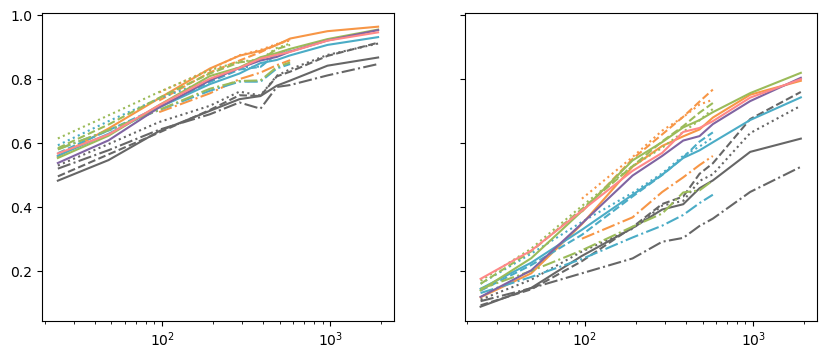

In [20]:
fig, ax = plt.subplots(1,2,  figsize=(10, 4), sharey=True)

for zs in ["none"] + ZS_OPTS:
    if zs == "ed_score":
        c = PRESENTATION_PALETTE_SATURATE["orange"]
    else:
        c = ZS_COLOR_MAP_APPENDED[zs]
    for encoding in all_slice["encoding"].unique():
        slice_df_ = all_slice[
            (all_slice["zs"] == zs) & (all_slice["encoding"] == encoding)
        ]
        ax[0].plot(
            slice_df_["n_sample"],
            slice_df_["top_maxes_mean"],
            color=c,
            linestyle=encoding_style[encoding],
            # label = zs + encoding
        )
        ax[1].plot(
            slice_df_["n_sample"],
            slice_df_["if_truemaxs_mean"],
            color=c,
            linestyle=encoding_style[encoding],
            label = zs + encoding
            )
# ax.set_title(f"zs={zs}")
ax[0].set_xscale("log")
ax[1].set_xscale("log")
# ax.set_xlabel("n_sample")
# ax.set_ylabel("top_maxes")
# ax[1].legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

In [22]:
pd.read_csv("results/mlde_ft/vis/all_df.csv")

,encoding,model,n_sample,ft_lib,rep,all_maxes,all_means,top_maxes,top_means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top,scale_fit
0,one-hot,boosting,96,500,0,0.166495,0.127217,0.340514,0.151450,0.657485,0.122420,0.0,3489.0,all,DHFR,Triad_score,384,max
1,one-hot,boosting,96,500,1,0.175224,0.128179,0.340514,0.152927,0.661300,0.143166,0.0,5928.0,all,DHFR,Triad_score,384,max
2,one-hot,boosting,96,500,2,0.142594,0.127528,0.340514,0.152332,0.660729,0.133517,0.0,2652.0,all,DHFR,Triad_score,384,max
3,one-hot,boosting,96,500,3,0.166777,0.127778,0.340514,0.152881,0.663913,0.131450,0.0,4413.0,all,DHFR,Triad_score,384,max
4,one-hot,boosting,96,500,4,0.148396,0.126632,0.152167,0.128790,0.645939,0.050567,0.0,6347.0,all,DHFR,Triad_score,384,max
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39595,one-hot,ridge,384,1138,45,0.175864,-0.096688,0.829639,0.021081,0.983750,-0.022809,0.0,107.0,double,TrpB3H,none,96,max
39596,one-hot,ridge,384,1138,46,0.041888,-0.038244,1.000000,0.041829,0.985067,-0.010446,1.0,17.0,double,TrpB3H,none,96,max
39597,one-hot,ridge,384,1138,47,0.117059,-0.059077,0.829639,0.020595,0.983132,-0.036553,0.0,107.0,double,TrpB3H,none,96,max
39598,one-hot,ridge,384,1138,48,0.197364,-0.100080,1.000000,0.041523,0.985232,-0.015393,1.0,5.0,double,TrpB3H,none,96,max


In [21]:
for zs in ["none"] + ZS_OPTS:
    for lib in mlde["lib"].unique():
        print(zs, lib)
        # print(mlde[(mlde["lib"] == lib) & (mlde["n_top"] == 96) & (mlde["encoding"] != "one-hot")])
        print(sorted(mlde[(mlde["lib"] == lib) & (mlde["n_top"] == 96) & (mlde["encoding"] != "one-hot") & (mlde["zs"] == zs)]["n_sample"].unique()))

none DHFR
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none GB1
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none ParD2
[24, 48, 96, 192, 288, 480, 576, 960, 1920]
none ParD3
[24, 48, 96, 192, 288, 480, 576, 960, 1920]
none TrpB3A
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3B
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3C
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3D
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3E
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3F
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3G
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3H
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB3I
[24, 48, 96, 192, 288, 384, 480, 576, 960, 1920]
none TrpB4
[24, 48, 96, 192, 288, 384, 480, 576]
ed_score DHFR
[]
ed_score GB1
[]
ed_score ParD2
[]
ed_score ParD3
[]
ed_score TrpB3A
[]
ed_score TrpB3B
[]
ed_score TrpB3C
[]
ed_score TrpB3D
[]
ed_score TrpB3E
[]
ed_score Tr